In [1]:
import numpy as np

x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

In [2]:
x_b=np.c_[np.ones((100,1)),x]
thetabest=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [3]:
thetabest

array([[4.22279849],
       [2.97949007]])

In [4]:
xnew=np.array([[0],[2]])
xnewb=np.c_[np.ones((2,1)),xnew]
ypredict=xnewb.dot(thetabest)
ypredict

array([[ 4.22279849],
       [10.18177862]])

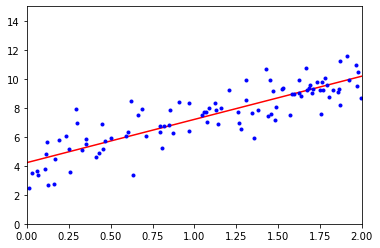

In [5]:
import matplotlib.pyplot as plt
plt.plot(xnew,ypredict,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [7]:
linreg.intercept_,linreg.coef_

(array([4.22279849]), array([[2.97949007]]))

In [8]:
linreg.predict(xnew)

array([[ 4.22279849],
       [10.18177862]])

In [9]:
thetabestsvd,residuals,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
thetabestsvd

array([[4.22279849],
       [2.97949007]])

In [10]:
np.linalg.pinv(x_b).dot(y)

array([[4.22279849],
       [2.97949007]])

In [11]:
eta=0.1
niterations=1000
m=100

theta=np.random.randn(2,1)
for iteration in range(niterations):
    gradiants=2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradiants
theta   

array([[4.22279849],
       [2.97949007]])

In [12]:
nepochs=50
t0,t1=5,50

def learningschedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)

for epoch in range(nepochs):
    for i in range(m):
        randomindex=np.random.randint(m)
        xi=x_b[randomindex:randomindex+1]
        yi=y[randomindex:randomindex+1]
        
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learningschedule(epoch*m+i)
        theta=theta-eta*gradients
m

100

In [13]:
theta

array([[4.24958032],
       [2.96773063]])

In [14]:
from sklearn.linear_model import SGDRegressor

sgdreg=SGDRegressor(max_iter=1000,tol=1e-3,eta0=0.1,penalty=None)
sgdreg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgdreg.intercept_,sgdreg.coef_

(array([4.22399693]), array([3.02758289]))

In [16]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)

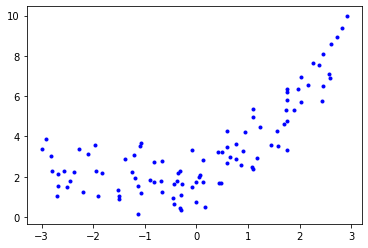

In [17]:
plt.plot(x,y,'b.')
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
xpoly=poly.fit_transform(x)


In [19]:
x[0]

array([-0.31034371])

In [20]:
xpoly[0]

array([-0.31034371,  0.09631322])

In [21]:
linreg=LinearRegression()
linreg.fit(xpoly,y)
linreg.intercept_,linreg.coef_

(array([2.06434136]), array([[1.0147062 , 0.46420993]]))

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plotcurves(model,x,y):
    xtrain,xval,ytrain,yval=train_test_split(x,y,test_size=0.2)
    trainerrors,valerrors=[],[]
    for m in range (1,len(xtrain)):
        model.fit(xtrain[:m],ytrain[:m])
        ytrainpredict=model.predict(xtrain[:m])
        yvalpredict=model.predict(xval)
        trainerrors.append(mean_squared_error(ytrain[:m],ytrainpredict))
        valerrors.append(mean_squared_error(yval,yvalpredict))
    plt.plot(np.sqrt(trainerrors),"r-+",linewidth=2)
    plt.plot(np.sqrt(valerrors),'b-',linewidth=3)

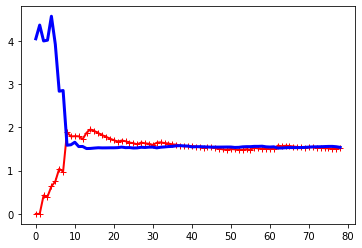

In [23]:
linreg=LinearRegression()
plotcurves(linreg,x,y)

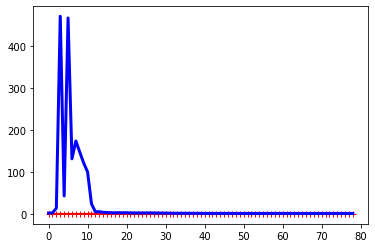

In [24]:
from sklearn.pipeline import Pipeline

polyregression=Pipeline([
    ('poly',PolynomialFeatures(degree=10,include_bias=False)),
    ("lin",LinearRegression())
])
plotcurves(polyregression,x,y)

In [25]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=1,solver='cholesky')
ridgereg.fit(x,y)
ridgereg.predict([[1.5]])

array([[4.76777276]])

In [26]:
sgdreg=SGDRegressor(penalty="l2")
sgdreg.fit(x,y.ravel())
sgdreg.predict([[1.5]])

array([4.7444099])

In [27]:
from sklearn.linear_model import Lasso

lassoreg=Lasso(alpha=0.1)
lassoreg.fit(x,y)
lassoreg.predict([[1.5]])

array([4.71843037])

In [28]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(x,y)
elastic.predict([[1.5]])

array([4.72004538])

In [34]:
"""from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

polyscal=Pipeline([
    ('poly',PolynomialFeatures(degree=90,include_bias=False)),
    ('stdscaler',StandardScaler())
])
xtrainpolyscaled=polyscal.fit_transform(x)
xvalpolyscaled=polyscal.transform(xval)"""

In [35]:
from sklearn import datasets

iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [36]:
x=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int)

In [40]:
from  sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(x,y)

LogisticRegression()

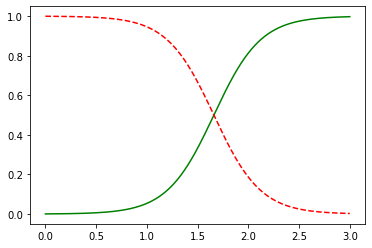

In [42]:
xnew=np.linspace(0,3,1000).reshape(-1,1)
yproba=logreg.predict_proba(xnew)
plt.plot(xnew,yproba[:,1],'g-')
plt.plot(xnew,yproba[:,0],'r--')
plt.show()

In [43]:
logreg.predict([[1.7],[1.5]])

array([1, 0])

In [45]:
x=iris["data"][:,(2,3)]
y=iris["target"]

softmaxreg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmaxreg.fit(x,y)

LogisticRegression(C=10, multi_class='multinomial')

In [49]:
softmaxreg.predict([[5,2]])

array([2])

In [50]:
softmaxreg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])